In [1]:
import pandas as pd 
import seaborn as sns 
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Read in cleaned 2019 and 2021 Dataframes
clean_2019 = pd.read_csv('mydata/MMSA2019_Cleaned.csv')
clean_2021 = pd.read_csv('mydata/MMSA2021_Cleaned.csv')

In [4]:
#Recapture the categorical columns 

for column in clean_2019.columns:
    if column != 'STATE' and clean_2019[column].dtype == 'object':
        clean_2019[column] = clean_2019[column].astype('category')


for column in clean_2021.columns:
    if column != 'STATE' and clean_2021[column].dtype == 'object':
        clean_2021[column] = clean_2021[column].astype('category')

        
clean_2021['DISPCODE'] = clean_2021['DISPCODE'].astype('category')
clean_2019['DISPCODE'] = clean_2019['DISPCODE'].astype('category')

In [5]:
clean_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83666 entries, 0 to 83665
Data columns (total 97 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DISPCODE  83666 non-null  category
 1   HHADULT   83666 non-null  float64 
 2   SEXVAR    83666 non-null  category
 3   GENHLTH   83666 non-null  category
 4   PHYSHLTH  83666 non-null  float64 
 5   MENTHLTH  83666 non-null  float64 
 6   _HLTHPLN  83666 non-null  category
 7   MEDCOST1  83666 non-null  category
 8   CHECKUP1  83666 non-null  category
 9   CVDINFR4  83666 non-null  category
 10  CVDCRHD4  83666 non-null  category
 11  CVDSTRK3  83666 non-null  category
 12  ASTHMA3   83666 non-null  category
 13  CHCSCNCR  83666 non-null  category
 14  CHCOCNCR  83666 non-null  category
 15  ADDEPEV3  83666 non-null  category
 16  CHCKDNY2  83666 non-null  category
 17  DIABETE4  83666 non-null  category
 18  MARITAL   83666 non-null  category
 19  EDUCA     83666 non-null  category
 20  RENTHO

In [6]:
clean_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104619 entries, 0 to 104618
Data columns (total 97 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   DISPCODE  104619 non-null  category
 1   HHADULT   104619 non-null  float64 
 2   SEXVAR    104619 non-null  category
 3   GENHLTH   104619 non-null  category
 4   PHYSHLTH  104619 non-null  float64 
 5   MENTHLTH  104619 non-null  float64 
 6   _HLTHPLN  104619 non-null  category
 7   MEDCOST1  104619 non-null  category
 8   CHECKUP1  104619 non-null  category
 9   CVDINFR4  104619 non-null  category
 10  CVDCRHD4  104619 non-null  category
 11  CVDSTRK3  104619 non-null  category
 12  ASTHMA3   104619 non-null  category
 13  CHCSCNCR  104619 non-null  category
 14  CHCOCNCR  104619 non-null  category
 15  ADDEPEV3  104619 non-null  category
 16  CHCKDNY2  104619 non-null  category
 17  DIABETE4  104619 non-null  category
 18  MARITAL   104619 non-null  category
 19  EDUCA     104619 non-nu

In [7]:
#Numerical columns for 2019 df
num_cols = list(clean_2019.select_dtypes(include=('float','int')).columns)
exclusions = ['_MMSA','_MMSAWT','_STSTR']
num_cols = [item for item in num_cols if item not in exclusions]

In [8]:
#Numerical columns for 2021 df
num_cols = list(clean_2021.select_dtypes(include=('float','int')).columns)
exclusions = ['_MMSA','_MMSAWT','_STSTR']
num_cols = [item for item in num_cols if item not in exclusions]

In [9]:
#Categorical Columns for 2019 df
cat_cols = clean_2019.select_dtypes(exclude=('float','int')).columns

In [10]:
#Categorical Columns for 2021 df
cat_cols = clean_2021.select_dtypes(exclude=('float','int')).columns

### EXPLORATORY DATA ANALYSIS

In [11]:
clean_2019[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,83666.0,2.130674,1.075550,1.0000,1.0000,2.000000,2.000000,5.0000,33.0000
PHYSHLTH,83666.0,3.915928,8.248362,0.0000,0.0000,0.000000,3.000000,30.0000,30.0000
MENTHLTH,83666.0,4.087730,8.063345,0.0000,0.0000,0.000000,4.000000,30.0000,30.0000
CPDEMO1B,83666.0,1.111192,0.422130,0.0000,1.0000,1.000000,1.000000,3.0000,6.0000
CHILDREN,83666.0,0.623634,1.094482,0.0000,0.0000,0.000000,1.000000,4.0000,15.0000
WEIGHT2,83666.0,183.360136,46.512572,69.0000,150.0000,178.000000,210.000000,325.0000,610.0000
HEIGHT3,83666.0,1.709740,0.105615,0.9144,1.6256,1.701800,1.778000,1.9304,2.3876
_PHYS14D,83666.0,1.493773,0.698251,1.0000,1.0000,1.000000,2.000000,3.0000,3.0000
_MENT14D,83666.0,1.514116,0.708418,1.0000,1.0000,1.000000,2.000000,3.0000,3.0000
_AGE80,83666.0,49.913501,16.839663,18.0000,36.0000,51.000000,63.000000,80.0000,80.0000


In [12]:
clean_2021[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,104619.0,2.168507,1.062907,1.0000,2.0000,2.000000,3.000000,5.0000,32.000
PHYSHLTH,104619.0,3.293350,7.642019,0.0000,0.0000,0.000000,2.000000,30.0000,30.000
MENTHLTH,104619.0,4.375792,8.138631,0.0000,0.0000,0.000000,5.000000,30.0000,30.000
CPDEMO1B,104619.0,1.105239,0.418503,0.0000,1.0000,1.000000,1.000000,3.0000,6.000
CHILDREN,104619.0,0.619859,1.077064,0.0000,0.0000,0.000000,1.000000,4.0000,21.000
WEIGHT2,104619.0,185.173608,46.700997,59.0000,150.0000,180.000000,210.000000,325.0000,630.000
HEIGHT3,104619.0,1.711756,0.105203,0.9144,1.6256,1.701800,1.781937,1.9304,2.413
_PHYS14D,104619.0,1.421960,0.666356,1.0000,1.0000,1.000000,2.000000,3.0000,3.000
_MENT14D,104619.0,1.551640,0.718843,1.0000,1.0000,1.000000,2.000000,3.0000,3.000
_AGE80,104619.0,50.032480,16.409673,18.0000,37.0000,51.000000,63.000000,80.0000,80.000


In [14]:
# Replace outliers with the 99 percentile value except weighted and Identification columns

#2019
for i in num_cols:
    percentile_99 = np.percentile(clean_2019[i], 99)
    clean_2019.loc[clean_2019[i] > percentile_99, i] = percentile_99
    
#2021
for i in num_cols:
    percentile_99 = np.percentile(clean_2021[i], 99)
    clean_2021.loc[clean_2021[i] > percentile_99, i] = percentile_99

In [15]:
clean_2019[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,83666.0,2.111551,0.982801,1.0000,1.0000,2.000000,2.000000,5.000000,5.00000
PHYSHLTH,83666.0,3.915928,8.248362,0.0000,0.0000,0.000000,3.000000,30.000000,30.00000
MENTHLTH,83666.0,4.087730,8.063345,0.0000,0.0000,0.000000,4.000000,30.000000,30.00000
CPDEMO1B,83666.0,1.102096,0.358218,0.0000,1.0000,1.000000,1.000000,3.000000,3.00000
CHILDREN,83666.0,0.609555,1.033060,0.0000,0.0000,0.000000,1.000000,4.000000,4.00000
WEIGHT2,83666.0,182.962045,44.910876,69.0000,150.0000,178.000000,210.000000,325.000000,325.00000
HEIGHT3,83666.0,1.709251,0.104388,0.9144,1.6256,1.701800,1.778000,1.930400,1.93040
_PHYS14D,83666.0,1.493773,0.698251,1.0000,1.0000,1.000000,2.000000,3.000000,3.00000
_MENT14D,83666.0,1.514116,0.708418,1.0000,1.0000,1.000000,2.000000,3.000000,3.00000
_AGE80,83666.0,49.913501,16.839663,18.0000,36.0000,51.000000,63.000000,80.000000,80.00000


In [16]:
clean_2021[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,104619.0,2.148596,0.962734,1.0000,2.0000,2.000000,3.000000,5.000000,5.0000
PHYSHLTH,104619.0,3.293350,7.642019,0.0000,0.0000,0.000000,2.000000,30.000000,30.0000
MENTHLTH,104619.0,4.375792,8.138631,0.0000,0.0000,0.000000,5.000000,30.000000,30.0000
CPDEMO1B,104619.0,1.095738,0.348349,0.0000,1.0000,1.000000,1.000000,3.000000,3.0000
CHILDREN,104619.0,0.607003,1.019102,0.0000,0.0000,0.000000,1.000000,4.000000,4.0000
WEIGHT2,104619.0,184.759000,45.048916,59.0000,150.0000,180.000000,210.000000,325.000000,325.0000
HEIGHT3,104619.0,1.711294,0.104043,0.9144,1.6256,1.701800,1.781937,1.930400,1.9304
_PHYS14D,104619.0,1.421960,0.666356,1.0000,1.0000,1.000000,2.000000,3.000000,3.0000
_MENT14D,104619.0,1.551640,0.718843,1.0000,1.0000,1.000000,2.000000,3.000000,3.0000
_AGE80,104619.0,50.032480,16.409673,18.0000,37.0000,51.000000,63.000000,80.000000,80.0000


<Axes: >

<Figure size 1200x800 with 0 Axes>

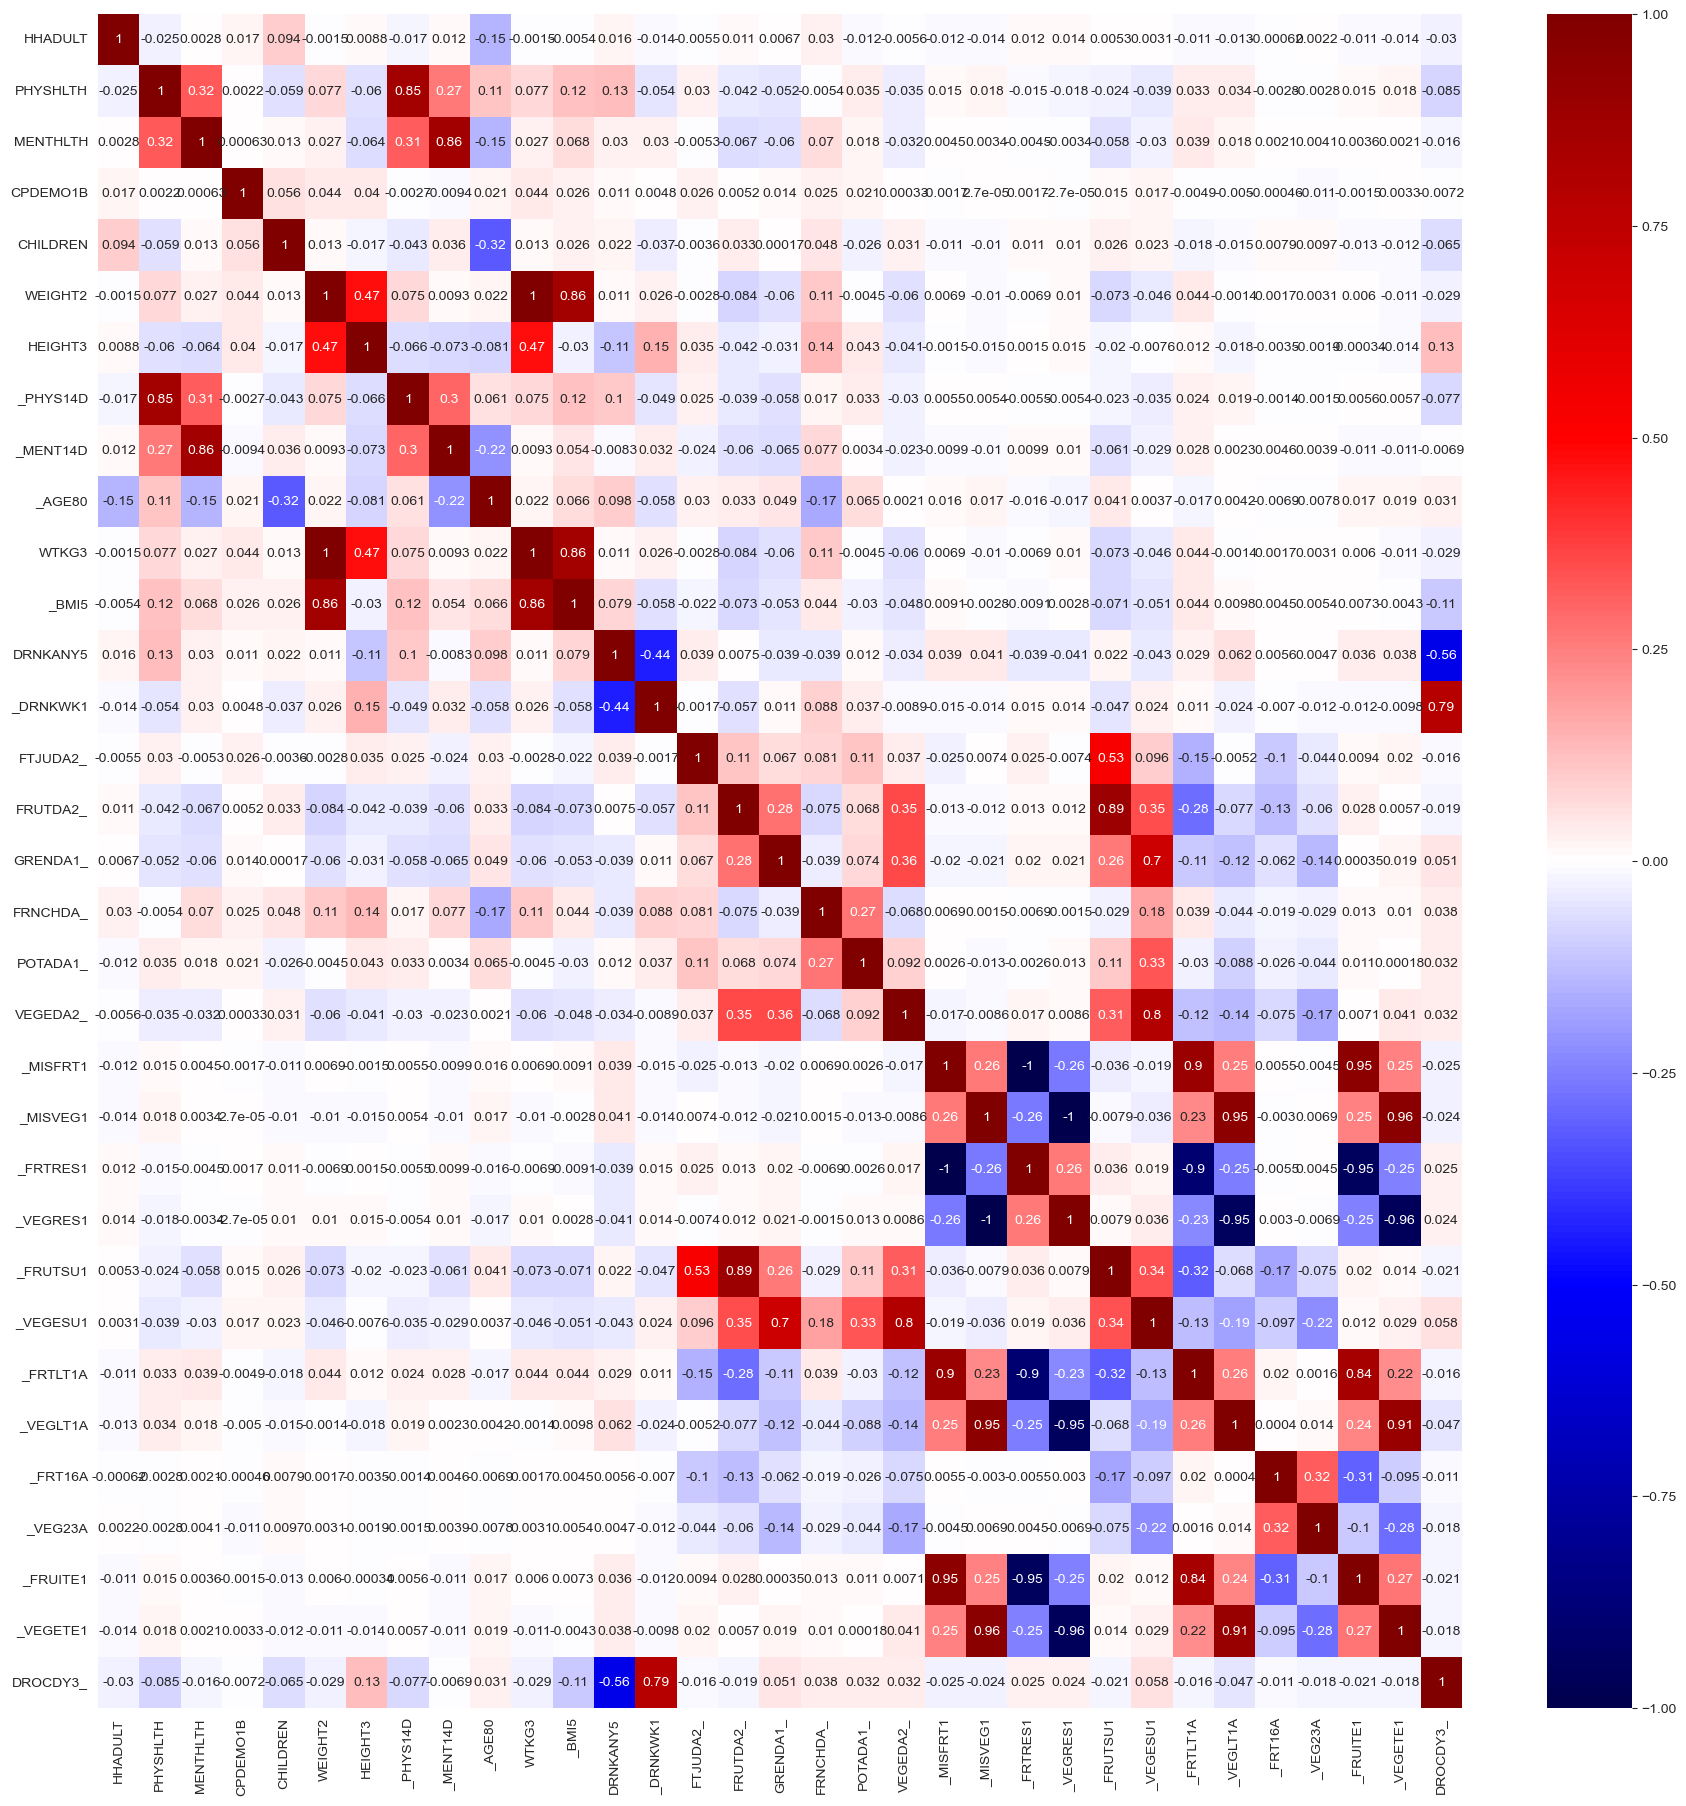

In [17]:
#Check for correlation between the numeric vairbales 
#2019
plt.figure(figsize=(12,8))
plt.figure(figsize=(22,22))
sns.set_style('darkgrid')
sns.heatmap(clean_2019[num_cols].corr(),cmap='seismic',annot=True)

<Axes: >

<Figure size 1200x800 with 0 Axes>

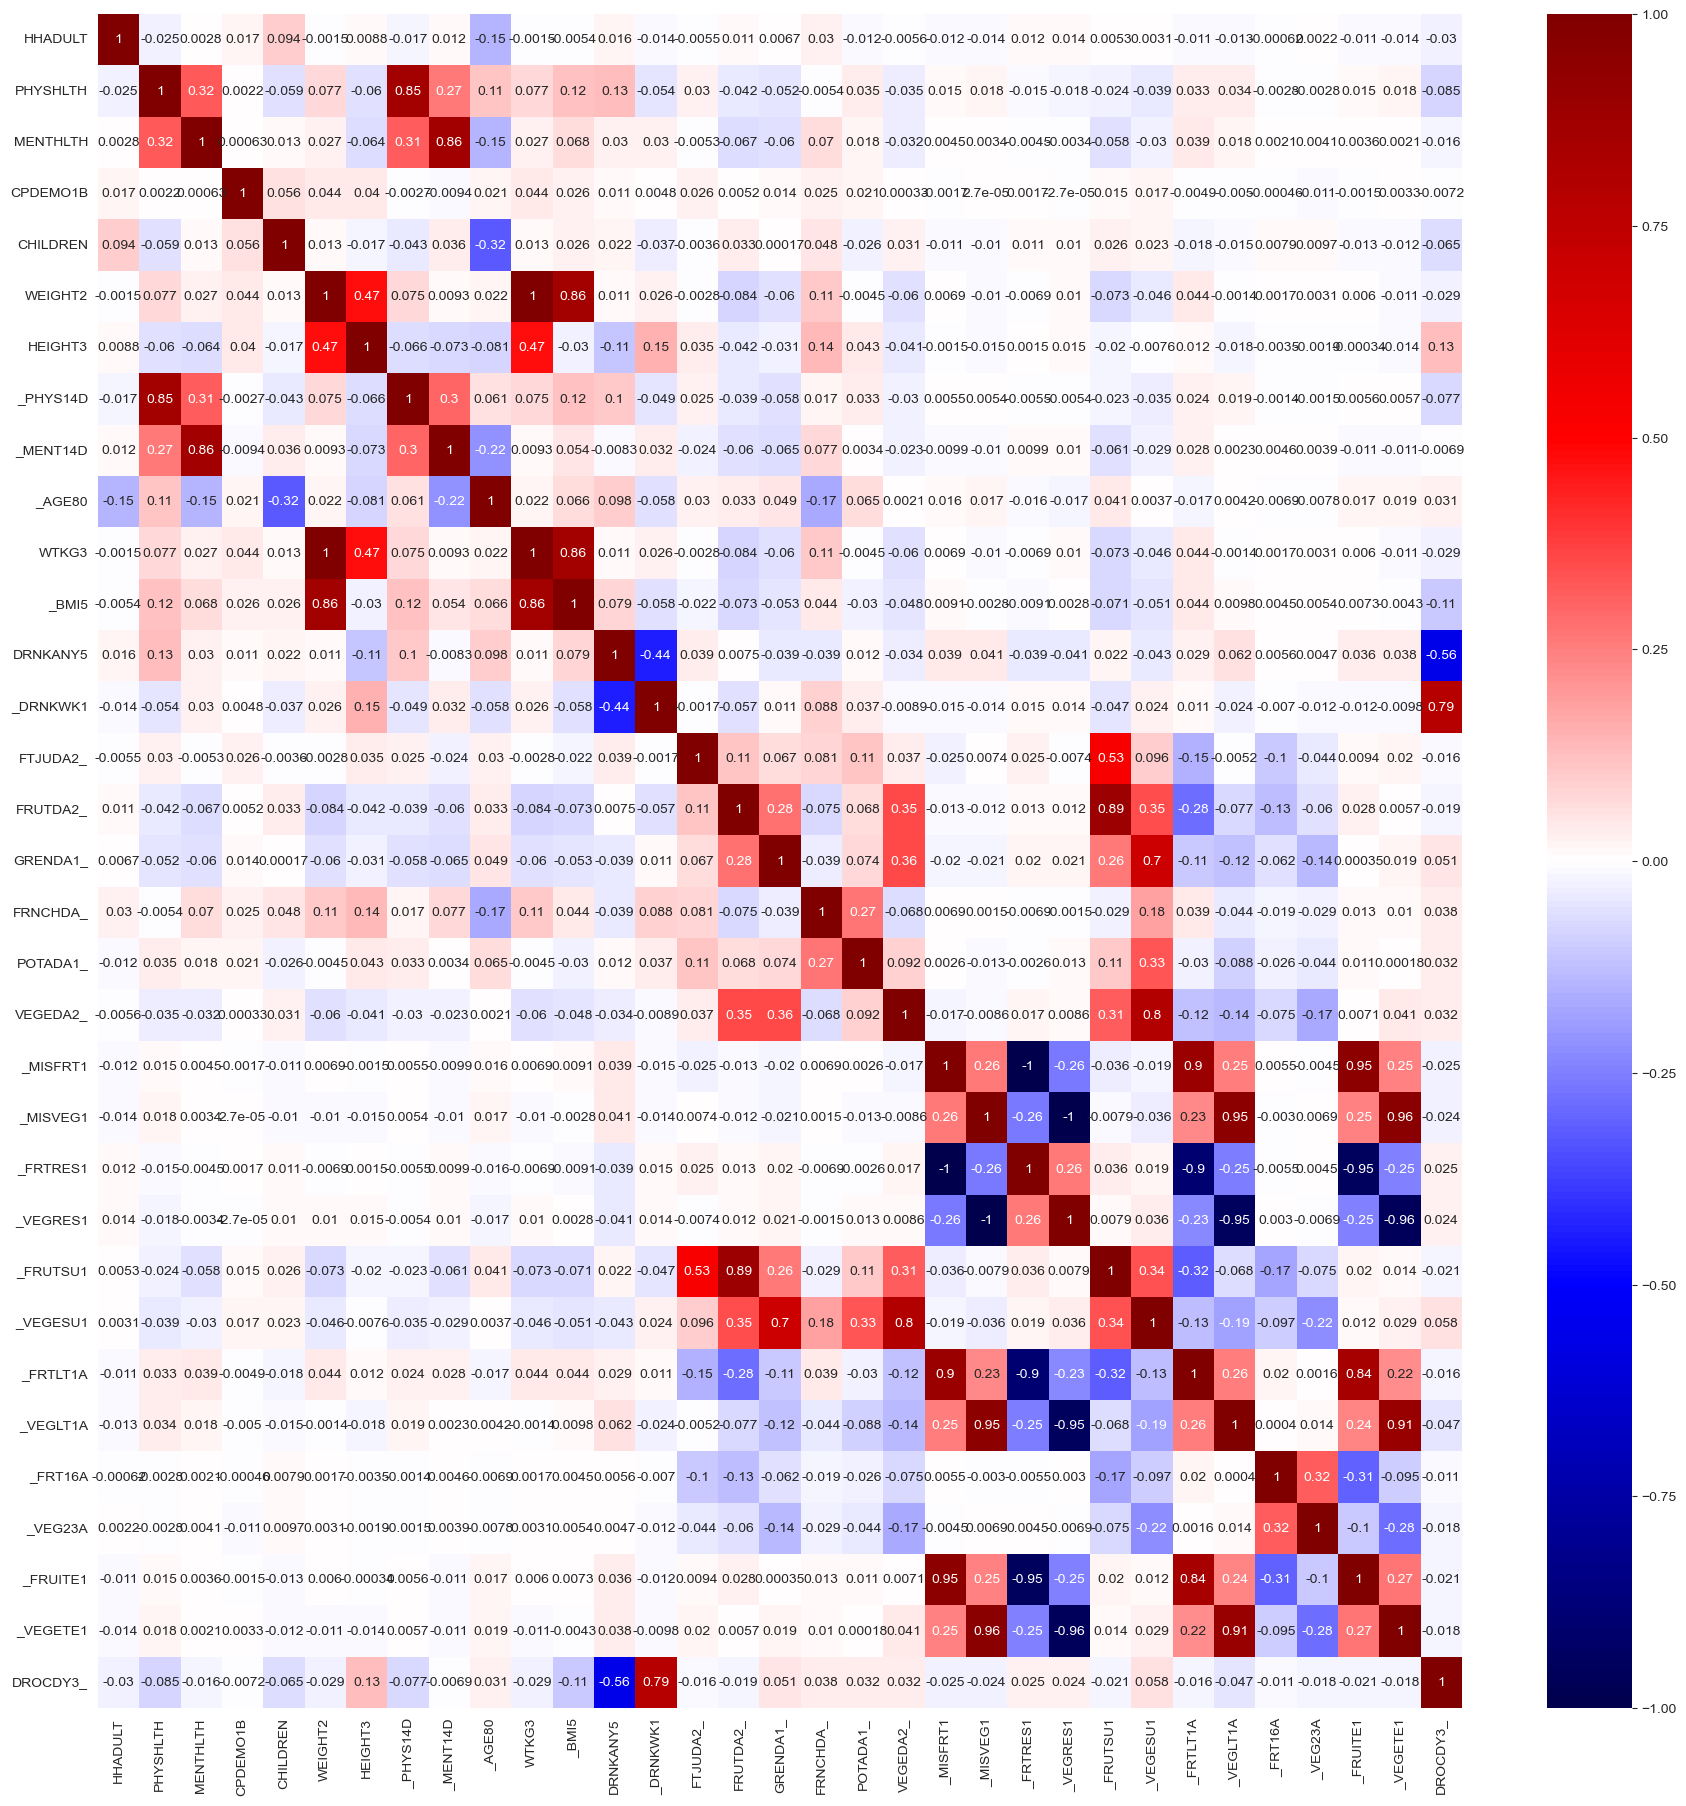

In [18]:
#Check for correlation between the numeric vairbales 
#2021
plt.figure(figsize=(12,8))
plt.figure(figsize=(22,22))
sns.set_style('darkgrid')
sns.heatmap(clean_2019[num_cols].corr(),cmap='seismic',annot=True)

- We can see the presence of significant multicolinearity between the fruits and vegetable columns, which we will
look to remove further down the line 

----

---

# Research Questions

In [19]:
#We will incorpoate a combination of data from 2019 and 2021 to answer all research questions

### #1 How do dietary habits, specifically the consumption of fruits and dark green vegetables, relate to overall health outcomes and perceived health predictions? 

A) We will compare the daily dark Vegetable Consumption between individuals with percieved good health Vs percieved bad health using statistical testing

B) We will compare the daily fruit Consumption between individuals with percieved good health Vs percieved bad health using statistical testing. 

C) Do F&V when consumed in quantities around 800 grams per day—roughly five servings daily, exhibit potent preventive effects against CVDs?


NB: (we will exclude fruit juice as it is known that fruit juice lacks fibre and is high in sugar. We will also be using both 2019 and 2021 data to answer these questions)


In [20]:
#(Fruits and Vegetable columns)
fv_cols= ['FTJUDA2_','FRUTDA2_','GRENDA1_','FRNCHDA_','POTADA1_','VEGEDA2_',
                       '_MISFRT1','_MISVEG1','_FRTRES1','_VEGRES1','_FRUTSU1','_VEGESU1',
                       '_FRTLT1A','_VEGLT1A','_FRT16A','_VEG23A','_FRUITE1','_VEGETE1']

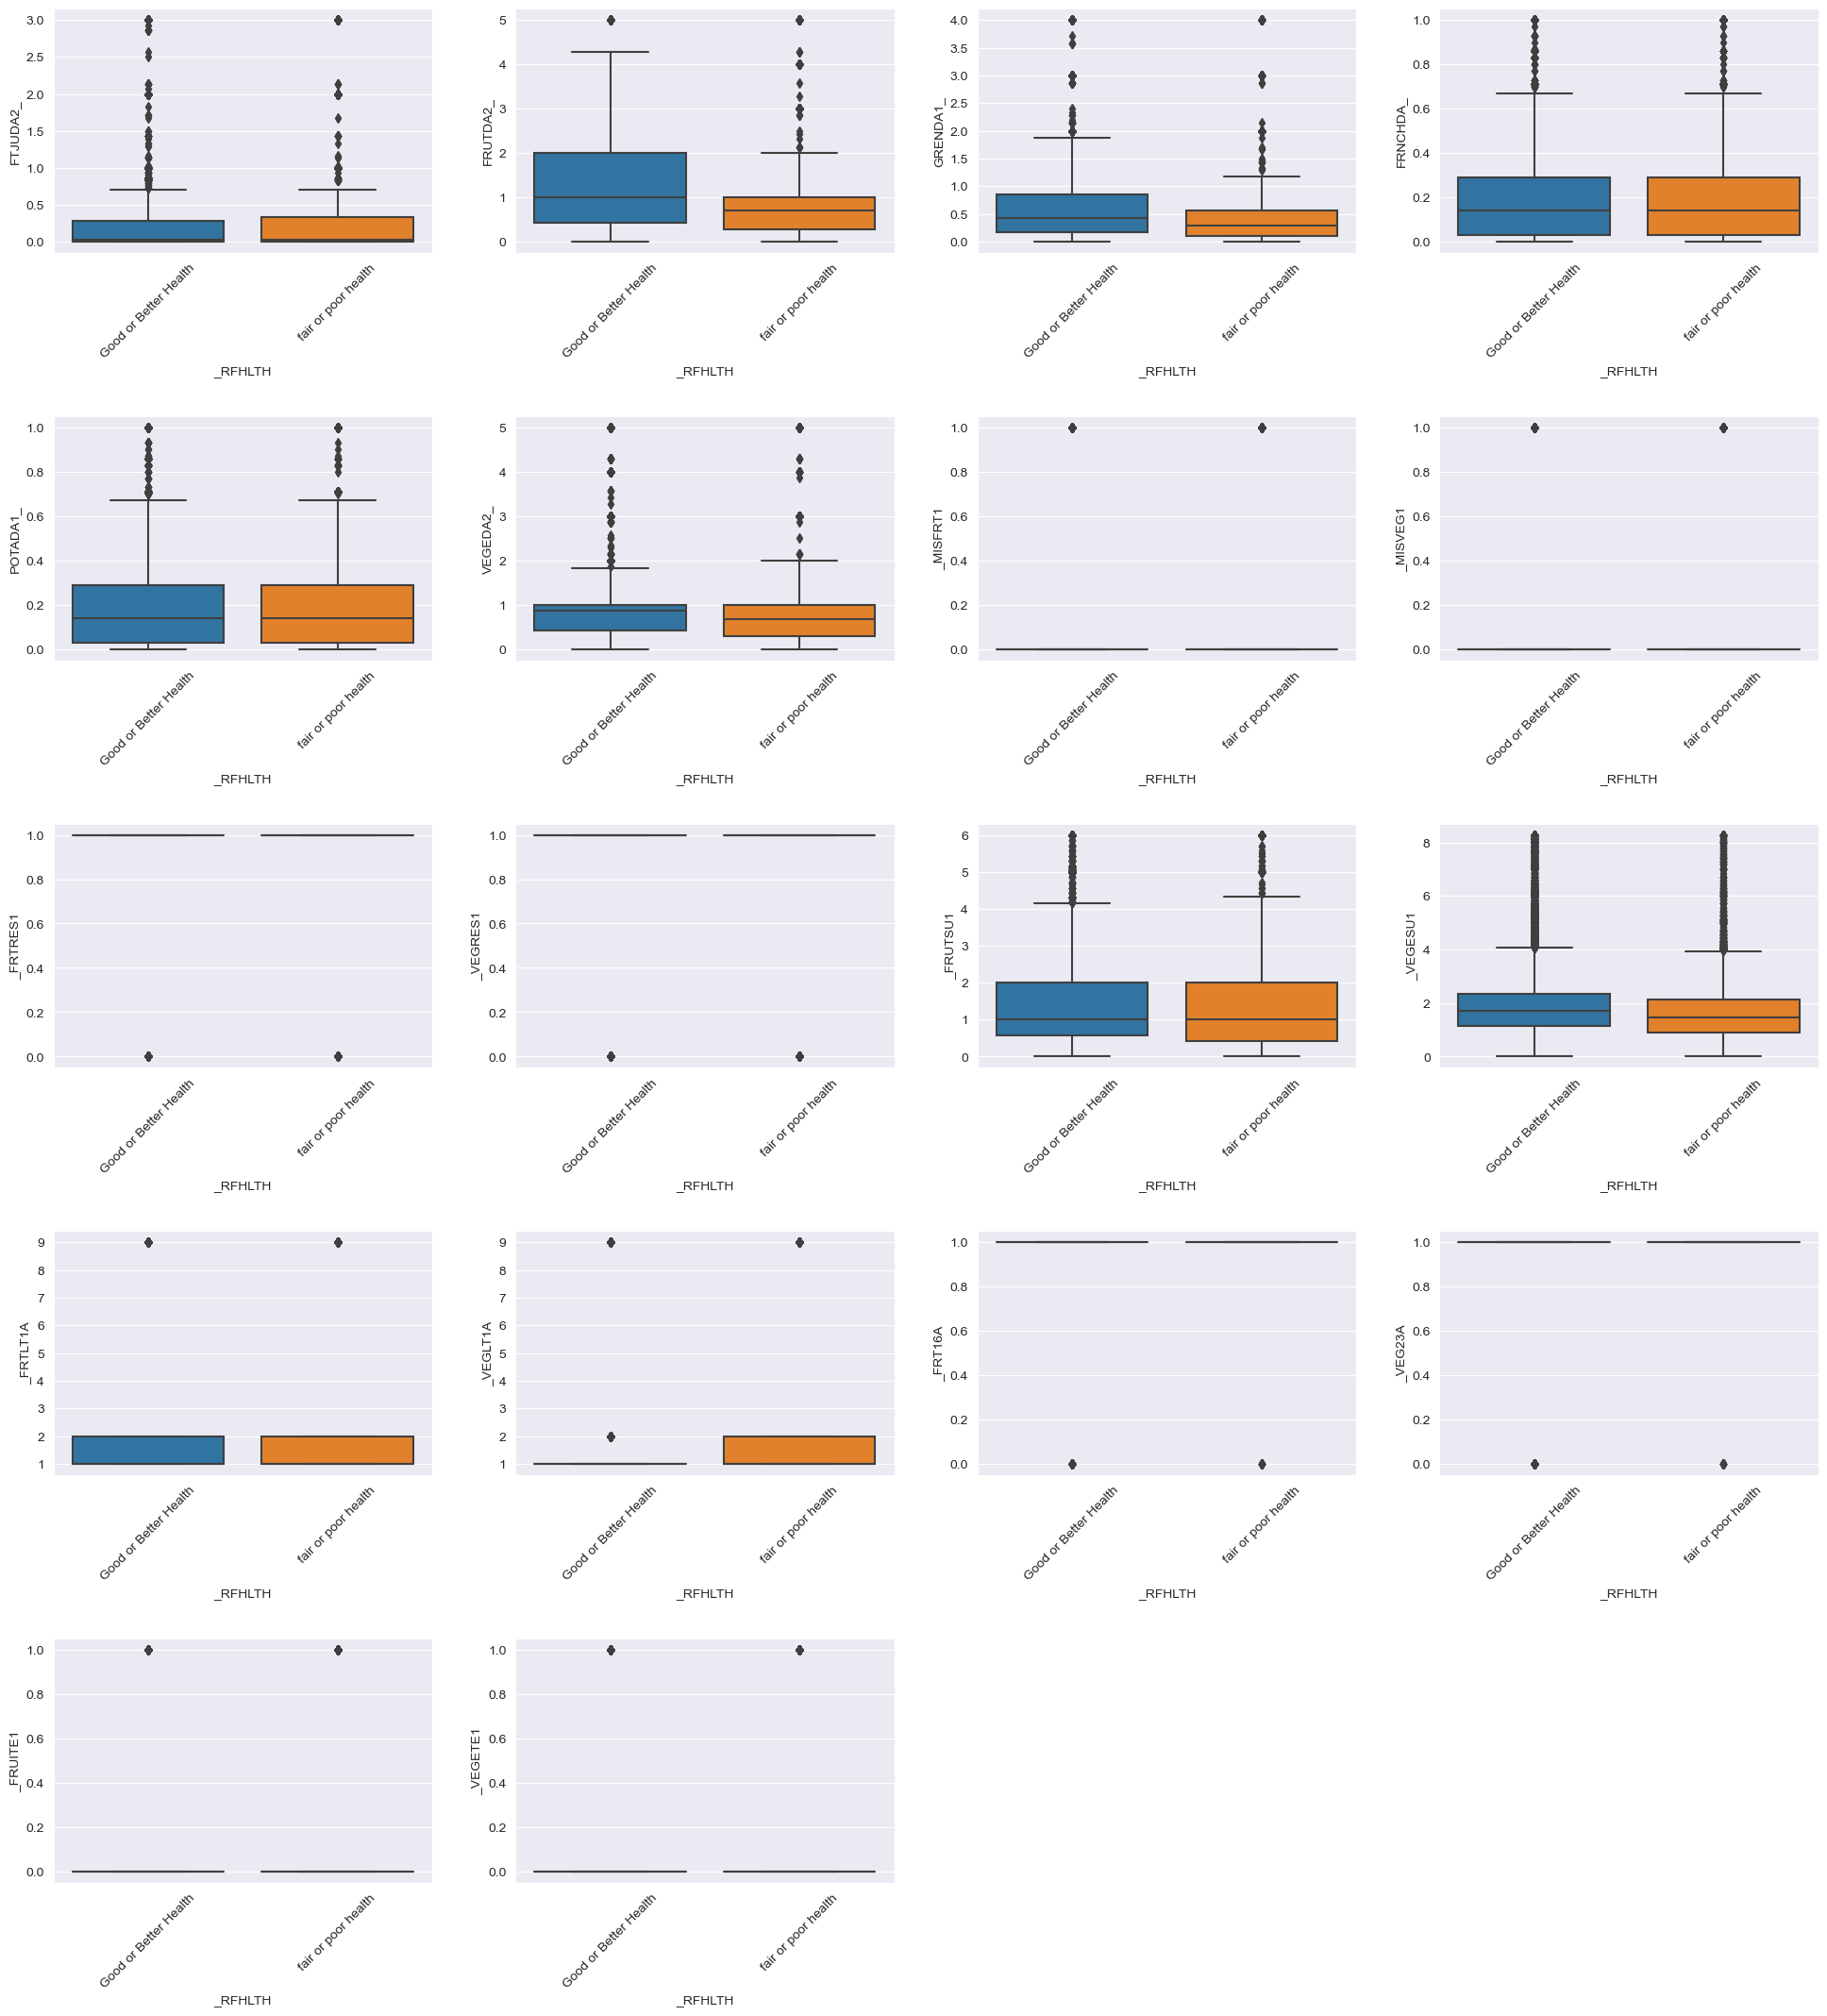

In [36]:
# Create a boxplot for each fruit and vegetable variable against the categorical target variable(_RFHLTH)

#2019
plt.figure(figsize=(20,25))
for i,j in zip(fv_cols, range(len(fv_cols))):
    plt.subplot(6,4,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=clean_2019, x='_RFHLTH', y=i)
plt.tight_layout(pad=3.0)  

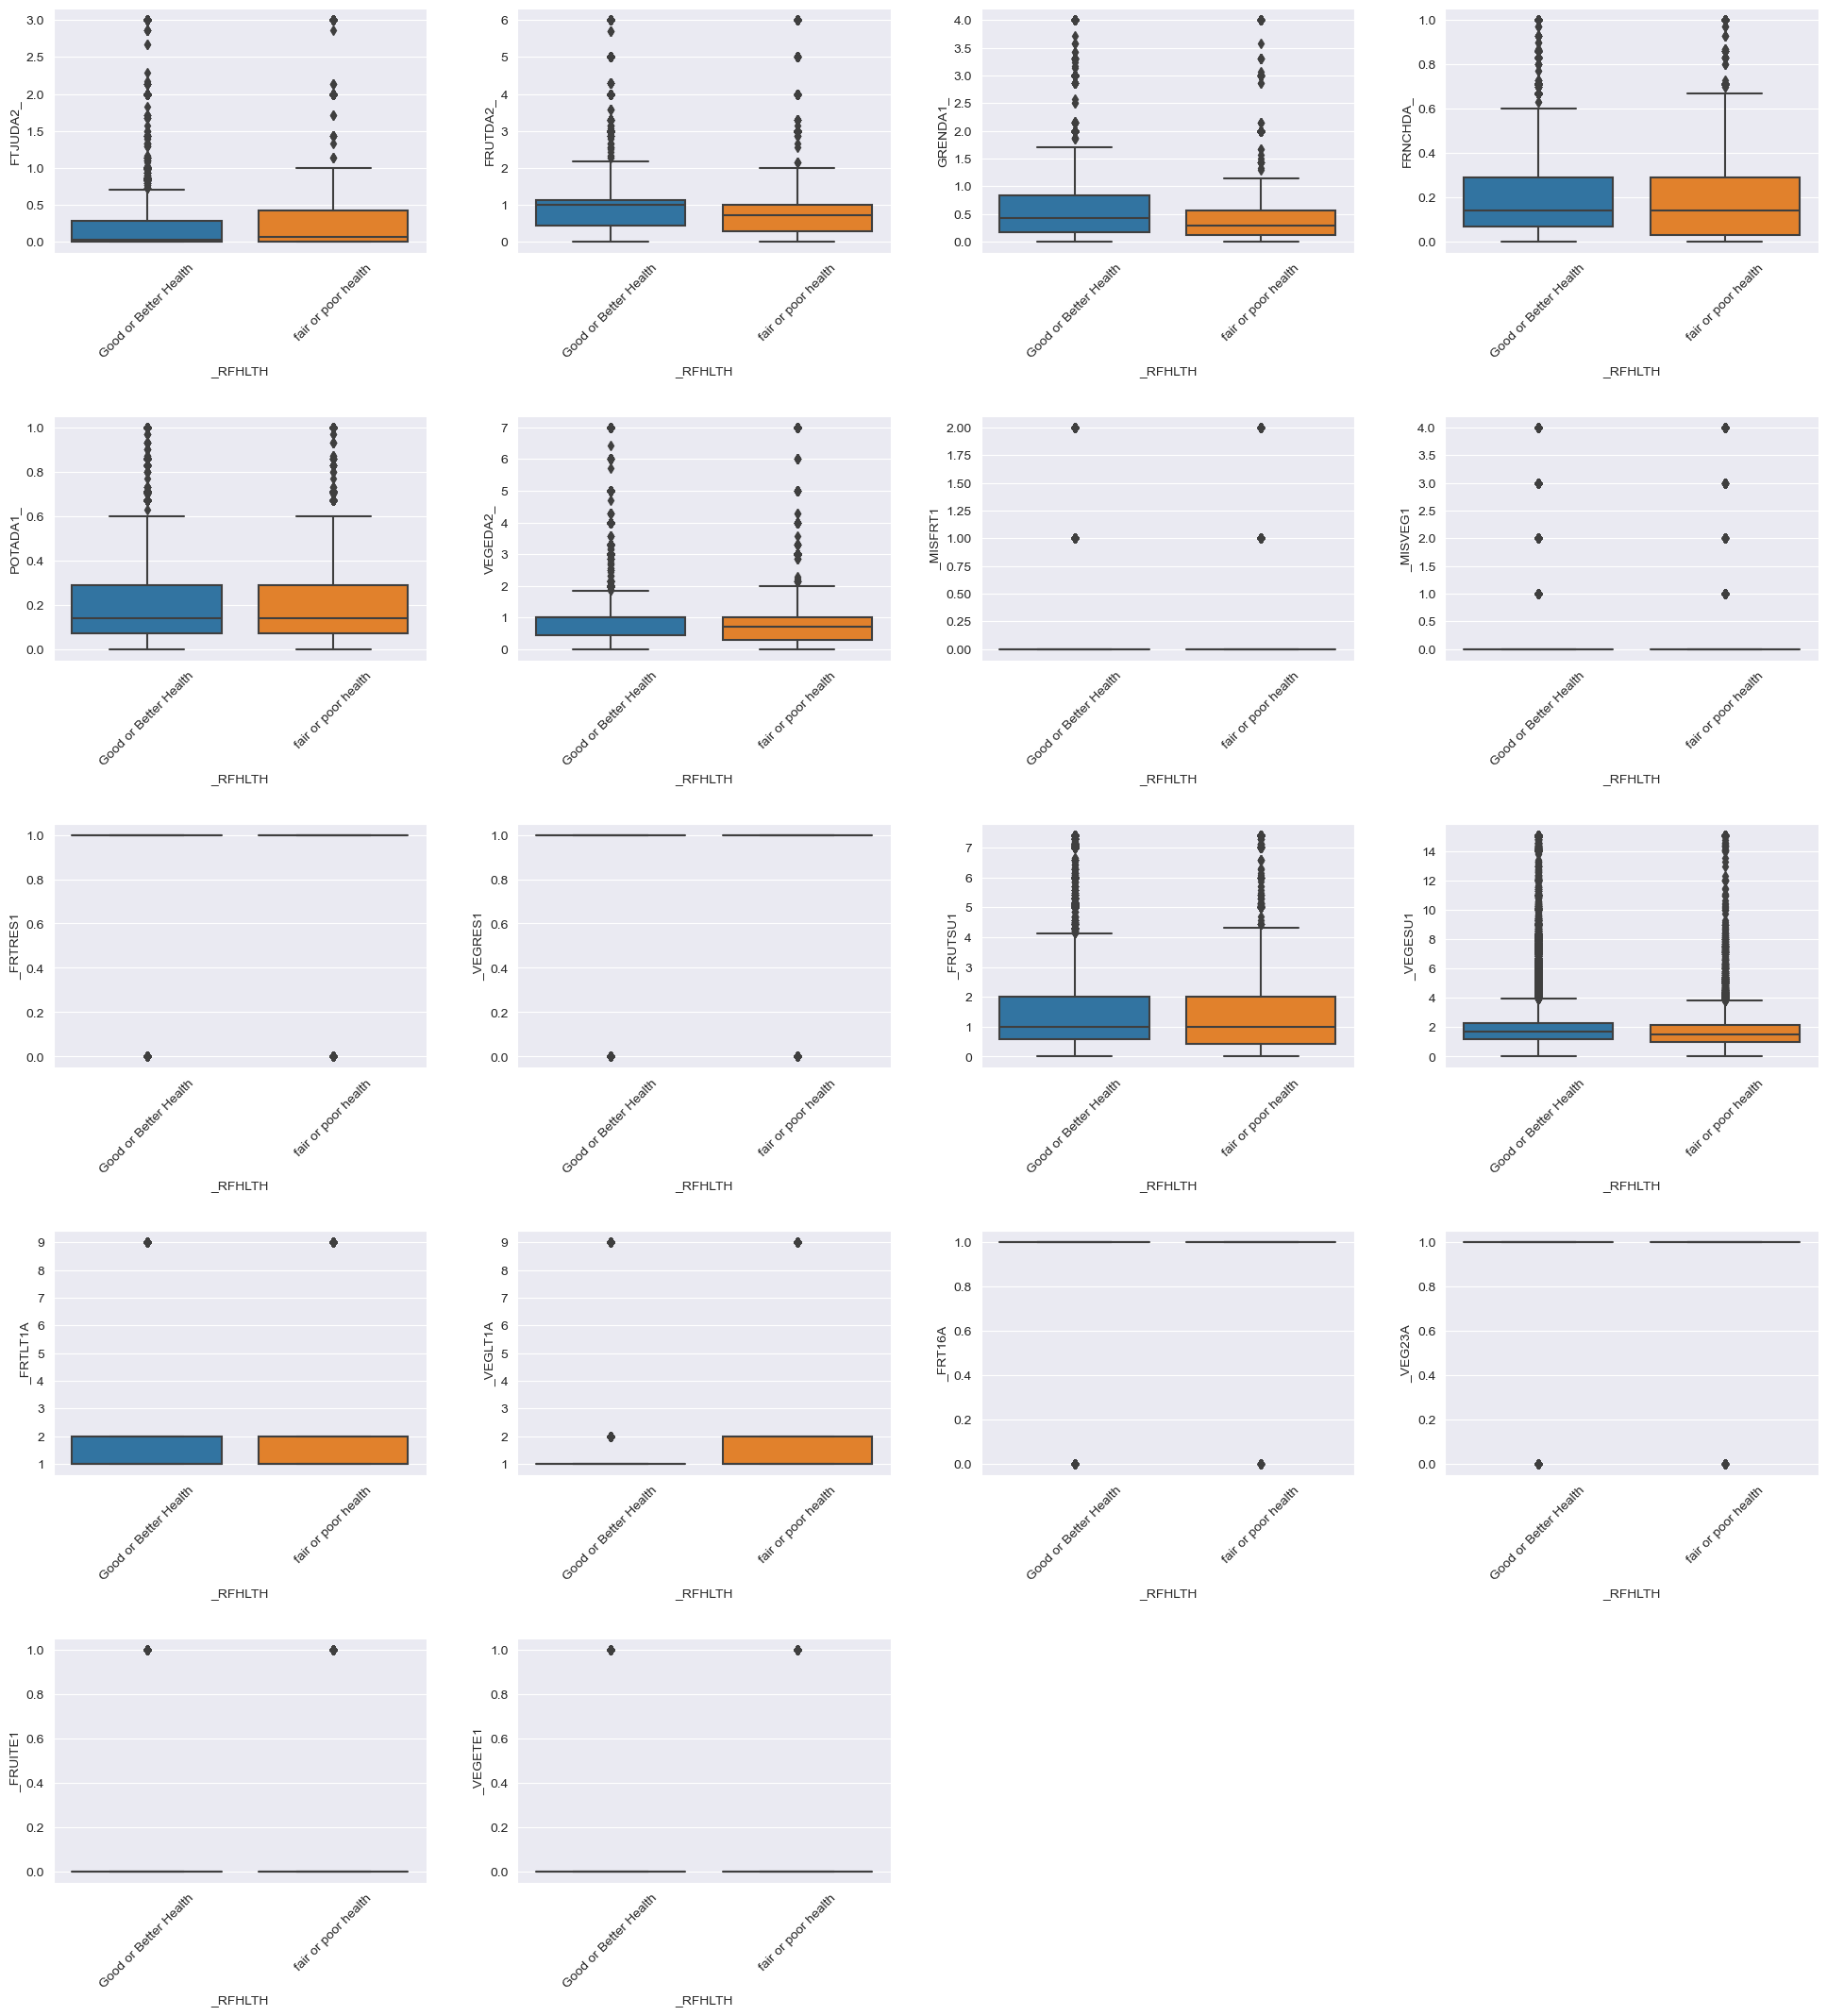

In [38]:
# Create a boxplot for each fruit and vegetable variable against the categorical target variable(_RFHLTH)

#2021
plt.figure(figsize=(20,25))
for i,j in zip(fv_cols, range(len(fv_cols))):
    plt.subplot(6,4,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=clean_2021, x='_RFHLTH', y=i)
plt.tight_layout(pad=3.0) 

#### A) Comparing vegetable consumption of those with percieved good health versus those with percieved bad health
* Assumptions: Due to large datset we will assume a normal distribution 

In [23]:
#Function for statistical significance
def categorize_significance(p_value):
    if p_value < 0.01:
        return "Highly significant"
    elif 0.01 <= p_value < 0.05:
        return "Statistically significant"
    elif 0.05 <= p_value < 0.10:
        return "Tending towards significance"
    else:
        return "Not statistically significant"

In [25]:
#We would like to compare two populations using Unpaired One-sided Sample T-test to see if there is a significant 
#difference between the mean fruit and vegetable consumption

from scipy import stats

In [26]:
#2019
#Get dark vegetable consumption of those that percieve their health to be good or better
dailydarkveg_good2019 = clean_2019['GRENDA1_'][clean_2019['_RFHLTH']=='Good or Better Health']

#Get dark vegetable consumption of those that percieve their health to be fair or poor
dailydarkveg_bad2019 = clean_2019['GRENDA1_'][clean_2019['_RFHLTH']=='fair or poor health']


In [28]:
#2019
t_statistic, two_tail_p_value  = stats.ttest_ind(dailydarkveg_good2019,dailydarkveg_bad2019, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("""Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)""")
else:
    print("""Fail to reject the null hypothesis 
          (no sufficient evidence that mean daily dark green vegetable 
          intake for those with good health is greater than mean daily 
          dark green vegetable intake for those with bad health)""")
    
categorize_significance(one_tail_p_value)

p-value: 3.163148348970913e-112
t-stat: 22.48442761509248
Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)


'Highly significant'

### Analysis of the Independent T-test

- **Null Hypothesis (H₀)**: Mean daily intake of dark green vegetables for those with percieved good health > those with percieved bad health.
- **Alternative Hypothesis (H₁)**: Mean daily intake of dark green vegetables for those with percieved good health > those with percieved bad health.

#### confidence interval = 95%

pvalue < 0.05(alpha) ; this indicates that we reject the null hypothesis that the means are equal 
pvalue < 0.01 this also shows that the results are highly statistically significant

In [27]:
#2021
#Get dark vegetable consumption of those that percieve their health to be good or better
dailydarkveg_good2021 = clean_2021['GRENDA1_'][clean_2021['_RFHLTH']=='Good or Better Health']

#Get dark vegetable consumption of those that percieve their health to be fair or poor
dailydarkveg_bad2021 = clean_2021['GRENDA1_'][clean_2021['_RFHLTH']=='fair or poor health']

In [29]:
#2021
t_statistic, two_tail_p_value  = stats.ttest_ind(dailydarkveg_good2021,dailydarkveg_bad2021, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("""Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)""")
else:
    print("""Fail to reject the null hypothesis 
          (no sufficient evidence that mean daily dark green vegetable 
          intake for those with good health is greater than mean daily 
          dark green vegetable intake for those with bad health)""")
    
categorize_significance(one_tail_p_value)

p-value: 4.066510956247874e-95
t-stat: 20.646351633710978
Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)


'Highly significant'

### Analysis of the Independent T-test

- **Null Hypothesis (H₀)**: Mean daily intake of dark green vegetables for those with percieved good health > those with percieved bad health.
- **Alternative Hypothesis (H₁)**: Mean daily intake of dark green vegetables for those with percieved good health > those with percieved bad health.

#### confidence interval = 95%

pvalue < 0.05(alpha) ; this indicates that we reject the null hypothesis that the means are equal 
pvalue < 0.01 this also shows that the results are highly statistically significant

---
---

#### B) Comparing the daily fruit Consumption between individuals with percieved good health Vs percieved bad health. 
* Assumptions: Due to large datset we will assume a normal distribution 

In [ ]:
#Get Fruit consumption of those that percieve their health to be good or better
dailyfruit_good = clean_2019['FRUTDA2_'][clean_2019['_RFHLTH']=='Good or Better Health']

#Get Fruit consumption of those that percieve their health to be fair or poor
dailyfruit_bad = clean_2019['FRUTDA2_'][clean_2019['_RFHLTH']=='fair or poor health']

In [ ]:
#Is the mean fruit consumption of those with percieved good health higher than those with percieved bad health?

t_statistic, two_tail_p_value  = stats.ttest_ind(dailyfruit_good, dailyfruit_bad, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("Reject the null hypothesis")
    print("""Conclusion: mean daily fruit intake for those with good health is greater 
            than mean daily fruit intake for those with bad health""")
else:
    print("Fail to reject the null hypothesis ")
    print("""Conclusion: no sufficient evidence that mean daily fruit intake for those 
            with good health is greater than mean daily fruit for those with bad health""")
    
categorize_significance(one_tail_p_value)

### Analysis of the Independent T-test

- **Null Hypothesis (H₀)**: Mean daily intake of fruits for those with percieved good health ≤ those with percieved bad health.
- **Alternative Hypothesis (H₁)**: Mean daily intake of fruits for those with percieved good health > those with percieved bad health.

#### confidence interval = 95%

pvalue < 0.05(alpha) ; this indicates that we reject the null hypothesis that the means are equal 
pvalue < 0.01 this also shows that the results are highly statistically significant


#### C) Do F&V when consumed in quantities around five servings daily, exhibit potent preventive effects against CardioVascular Disease?
* Assumptions: Due to large datset we will assume a normal distribution 

In [ ]:
#Compare the mean the mean number of CDVS in those that consume 5 or more servings of FV 
#versus those that consume less than 5 servings daily

#CVDINFR4 heart attatck or MI
#CVDCRHD4 Angina or CHD
#CVDSTRK3 Stroke

# Mapping 'yes' to 1 and 'no' to 0, and summing the values
clean_2019['total_cvd_cases'] = (clean_2019['CVDINFR4'].replace({'yes': 1, 'no': 0}) +
                                   clean_2019['CVDCRHD4'].replace({'yes': 1, 'no': 0}) +
                                   clean_2019['CVDSTRK3'].replace({'yes': 1, 'no': 0}))

clean_2019['totalF&V'] = clean_2019['_VEGESU1'] + clean_2019['FRUTDA2_']

In [ ]:
sns.boxplot(x='total_cvd_cases', y='totalF&V', data=clean_2019)
plt.title(f'Boxplot of totalF&V vs total_cvd_cases')
plt.show()

In [ ]:
#Get totalCVD's of those that consume => 5 F&V daily
totalcvd_great5 = clean_2019['total_cvd_cases'][clean_2019['totalF&V'] >= 5]

#Get totalCVD's of those that consume < 5 F&V fruits daily
totalcvd_less5 = clean_2019['total_cvd_cases'][clean_2019['totalF&V']< 5]

In [ ]:
t_statistic, two_tail_p_value  = stats.ttest_ind(totalcvd_less5,totalcvd_great5, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("Reject the null hypothesis")
    print("""Conclusion: mean total CVD cases for those who eat less than 5 servings of F&V is greater 
            than mean total CVD cases for those who eat 5 or more servings of F&V""")
else:
    print("Fail to reject the null hypothesis ")
    print("""Conclusion: no sufficient evidence that mean total CVD cases for those who eat less than 5 servings of F&V is greater 
            than mean total CVD cases for those who eat 5 or more servings of F&V""")
    
categorize_significance(one_tail_p_value)

##MODEL DEVELOPMENT

In [ ]:
#Handle Multicolinearity

In [ ]:
#Here we want to print out the value count in eah categorical column
# normalize used to get the percentage 
for i in list(cat_cols):
    print(processed_features_df[i].value_counts(normalize=True))
    print('**********************************')

In [ ]:
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [ ]:
#lets create a new data frame with only dummmy categorical data and num columns 

dummies_df = processed_features_df[num_cols]
cat_cols = list(cat_cols)

for i in ['GENHLTH','_RFHLTH']:
    cat_cols.remove(i)


for i in cat_cols:
    temp = pd.get_dummies(processed_features_df[i],drop_first=True,prefix=i)
    dummies_df = pd.concat([dummies_df,temp],axis=1)

dummies_df.head()

In [ ]:
dummies_df.columns = dummies_df.columns.astype(str)
processed_features_df.columns = processed_features_df.columns.astype(str)

In [ ]:
X = dummies_df
y = processed_features_df['_RFHLTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

In [ ]:
feature_importances = sel.estimator_.feature_importances_


In [ ]:
import pandas as pd

features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
feat_50 = features.head(50)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 30))
plt.barh(feat_50['Feature'], feat_50['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.title('Feature Importances from Random Forest')
plt.show()


In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
selected_feat

In [ ]:
X = processed_features_df.drop(columns=['GENHLTH','_RFHLTH'])
y = processed_features_df['_RFHLTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Convert category columns from object to category
for col in X_train.select_dtypes(['object']):
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(objective='binary', num_leaves=31, learning_rate=0.05, n_estimators=100)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Plot feature importances
features = X_train.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 17))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.xlabel("LightGBM Feature Importance")
plt.show()

In [ ]:
# Number of top features
n = 45

# Get the indices of the top n features
top_indices = importances.argsort()[-n:][::-1]

# Display the top n features and their importances
top_features = features[top_indices]
top_importances = importances[top_indices]

for feature, importance in zip(top_features, top_importances):
    print(f"Feature: {feature}, Importance: {importance}")

In [ ]:
#Lets look at the categorical features in the top n features
categorical_top_features = [feature for feature in top_features if X_train[feature].dtype == 'category']
for feature, importance in zip(categorical_top_features, top_importances):
    print(f"Cat feature: {feature}, Importance: {importance}")